In [125]:
import pandas as pd
import csv
import numpy as np
import seaborn as sns

In [126]:
import re

In [127]:
from sklearn.feature_extraction import DictVectorizer
from sklearn.metrics.pairwise import cosine_similarity

In [128]:
DATA_PATH = '../chatbot__fragrance_recommendation/data/noon_perfumes_dataset.csv'
data = pd.read_csv(DATA_PATH)

In [129]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1003 entries, 0 to 1002
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Unnamed: 0          1003 non-null   int64  
 1   brand               1003 non-null   object 
 2   name                1003 non-null   object 
 3   old_price           1003 non-null   float64
 4   new_price           1003 non-null   float64
 5   ml                  1003 non-null   int64  
 6   concentration       1003 non-null   object 
 7   department          1003 non-null   object 
 8   scents              1003 non-null   object 
 9   base_note           1003 non-null   object 
 10  middle_note         1003 non-null   object 
 11  item_rating         1003 non-null   float64
 12  seller              1003 non-null   object 
 13  seller_rating       1003 non-null   float64
 14  num_seller_ratings  1003 non-null   object 
dtypes: float64(4), int64(2), object(9)
memory usage: 117.7+

In [130]:
df = pd.DataFrame(data)

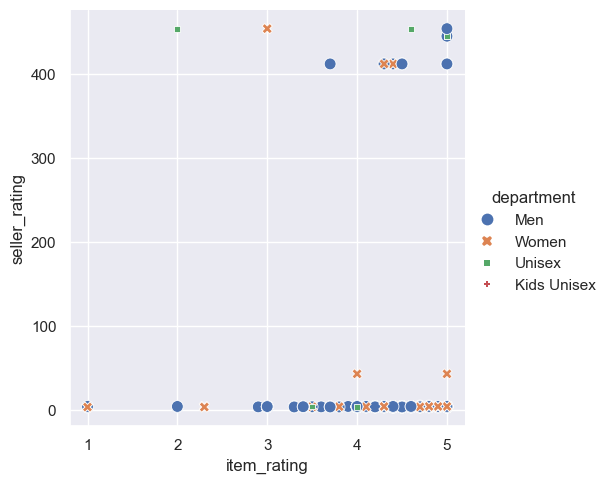

In [131]:
sns.set_theme()
sns.relplot(
    data=df,
    x="item_rating", y="seller_rating",
    hue="department", style="department", size="department",
)

In [132]:
df['seller_rating'].unique()

array([  4.2,  43. ,   3.7,   3.9,   3.8,   3.6,   3.5,   4.3,   4.4,
         4.1,   4.8, 412. , 454. , 445. ,   4. ])

In [133]:
def fix_rating(r):
    if r > 5:
        if r < 100:
            r = r/10
        elif r > 100:
            r = r/100
    return r
        
df['seller_rating'] = df['seller_rating'].apply(fix_rating)

In [134]:
print(df[df['seller_rating'] > 5])

Empty DataFrame
Columns: [Unnamed: 0, brand, name, old_price, new_price, ml, concentration, department, scents, base_note, middle_note, item_rating, seller, seller_rating, num_seller_ratings]
Index: []


In [135]:
df.nunique()

Unnamed: 0            1003
brand                  160
name                   594
old_price              438
new_price              644
ml                      28
concentration            5
department               4
scents                  22
base_note              739
middle_note            726
item_rating             23
seller                 117
seller_rating           14
num_seller_ratings      60
dtype: int64

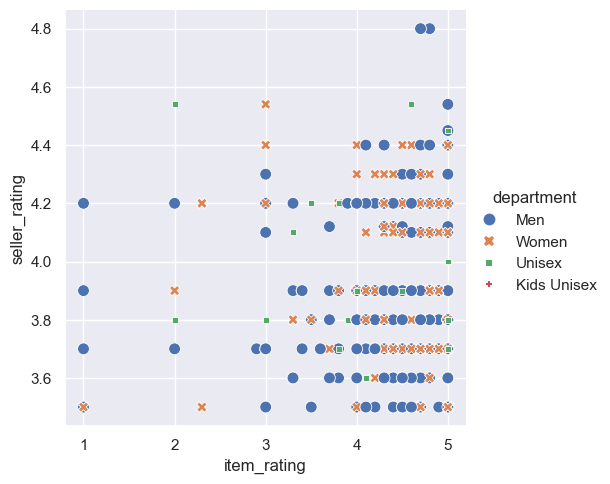

In [136]:
sns.set_theme()
sns.relplot(
    data=df,
    x="item_rating", y="seller_rating",
    hue="department", style="department", size="department",
)

In [137]:
df["department"] = df["department"].str.lower().replace("kids unisex", "unisex")
print(df["department"].value_counts())


department
women     503
men       433
unisex     67
Name: count, dtype: int64


In [138]:
df['price_per_ml'] = df['new_price']/df['ml']

In [139]:
df.head()

,Unnamed: 0,brand,name,old_price,new_price,ml,concentration,department,scents,base_note,middle_note,item_rating,seller,seller_rating,num_seller_ratings,price_per_ml
0,0,PACO RABANNE,1 Million Lucky,395.0,244.55,100,EDT,men,Woody,"Oakmoss, Patchouli and Vetiver","Hazelnut, Jasmine, Cashmir Wood, Cedar and Honey",5.0,noon,4.2,98.1K,2.4455
1,1,Roberto Cavalli,Paradiso Assoluto,415.0,107.95,50,EDP,women,Floral,"Vanilla, Sandalwood And Patchouli",Wild Jasmine and Red Lily,4.8,noon,4.2,98.1K,2.1590
2,2,S.T.Dupont,Royal Amber,265.0,186.90,100,EDP,unisex,Arabian,"Lemon, Mint and Wood Moss",Sandalwood and Cedar,5.0,noon,4.2,98.1K,1.8690
3,3,GUESS,Seductive Blue,290.0,103.20,100,EDT,men,Spicy,"Cashmere Wood, Moss And Rippled Sand Accord",Blue Coral Aquaspace Accord And Geranium,3.0,noon,4.2,98.1K,1.0320
4,4,Roberto Cavalli,Uomo,260.0,94.95,50,EDP,women,Arabian,"Vanille, Benzoin, Tonka Bean",African Orange Flower,4.8,noon,4.2,98.1K,1.8990


In [143]:
def normalize_text(text):
    if pd.isna(text):
        return []
    data = re.split(r',|\s+&', str(text), flags=re.I)
    return [p.strip().title() for p in data if p.strip()]

In [142]:
df['scents'].unique()

array(['Woody', 'Floral', 'Arabian', 'Spicy', 'Oriental', 'Fruity',
       'Fresh', 'Citrus', 'Vanilla', 'Musk', 'Oriental, Floral',
       'Sweet Aromatic', 'Aromatic', 'Woody, Sweet', 'Aromatic,Citrus',
       'Clean', 'Woody, Musky', 'Floral and Oriental', 'Jasmine',
       'Woody And Spicy', 'Rose, Floral', 'Sandalwood'], dtype=object)

In [ ]:
def split_scent(text):
    if not isinstance(text, str):
        return []
    parts = re.split(r',|\s+and\s+|\s*&\s*" "', text, flags=re.I)
    return [p.strip().title() for p in parts if p.strip()]


In [172]:
result = []
for scent in df['scents']:
    if scent.lower() == "musky":
        scent = "Musk"
    result.append(split_scent(scent))
print(result)

[['Woody'], ['Floral'], ['Arabian'], ['Spicy'], ['Arabian'], ['Arabian'], ['Oriental'], ['Fruity'], ['Floral'], ['Arabian'], ['Fresh'], ['Citrus'], ['Fruity'], ['Floral'], ['Woody'], ['Floral'], ['Woody'], ['Fresh'], ['Floral'], ['Floral'], ['Floral'], ['Woody'], ['Woody'], ['Woody'], ['Vanilla'], ['Fruity'], ['Woody'], ['Floral'], ['Musk'], ['Spicy'], ['Woody'], ['Woody'], ['Oriental', 'Floral'], ['Oriental'], ['Woody'], ['Floral'], ['Spicy'], ['Spicy'], ['Floral'], ['Floral'], ['Floral'], ['Citrus'], ['Citrus'], ['Floral'], ['Vanilla'], ['Floral'], ['Floral'], ['Vanilla'], ['Floral'], ['Citrus'], ['Floral'], ['Fresh'], ['Fresh'], ['Citrus'], ['Arabian'], ['Floral'], ['Floral'], ['Fruity'], ['Floral'], ['Floral'], ['Floral'], ['Floral'], ['Floral'], ['Woody'], ['Fruity'], ['Spicy'], ['Woody'], ['Citrus'], ['Fresh'], ['Spicy'], ['Woody'], ['Spicy'], ['Woody'], ['Floral'], ['Floral'], ['Citrus'], ['Fresh'], ['Floral'], ['Woody'], ['Sweet Aromatic'], ['Woody'], ['Floral'], ['Fresh'], ['F

In [175]:
unique_scents = sorted(set(sum(result, [])))
unique_scents = [s for s in unique_scents if s != "Musky"]


print(unique_scents)


['Arabian', 'Aromatic', 'Citrus', 'Clean', 'Floral', 'Fresh', 'Fruity', 'Jasmine', 'Musk', 'Oriental', 'Rose', 'Sandalwood', 'Spicy', 'Sweet', 'Sweet Aromatic', 'Vanilla', 'Woody']


In [161]:
prefix='scent.'
for scent in unique_scents:
    df[f"{prefix}{scent}"] = df['scents'].map(lambda x: int(scent in split_scent(x)))
    
df.head()


,Unnamed: 0,brand,name,old_price,new_price,ml,concentration,department,scents,base_note,...,scent.Musk,scent.Musky,scent.Oriental,scent.Rose,scent.Sandalwood,scent.Spicy,scent.Sweet,scent.Sweet Aromatic,scent.Vanilla,scent.Woody
0,0,PACO RABANNE,1 Million Lucky,395.0,244.55,100,EDT,men,Woody,"Oakmoss, Patchouli and Vetiver",...,0,0,0,0,0,0,0,0,0,1
1,1,Roberto Cavalli,Paradiso Assoluto,415.0,107.95,50,EDP,women,Floral,"Vanilla, Sandalwood And Patchouli",...,0,0,0,0,0,0,0,0,0,0
2,2,S.T.Dupont,Royal Amber,265.0,186.90,100,EDP,unisex,Arabian,"Lemon, Mint and Wood Moss",...,0,0,0,0,0,0,0,0,0,0
3,3,GUESS,Seductive Blue,290.0,103.20,100,EDT,men,Spicy,"Cashmere Wood, Moss And Rippled Sand Accord",...,0,0,0,0,0,1,0,0,0,0
4,4,Roberto Cavalli,Uomo,260.0,94.95,50,EDP,women,Arabian,"Vanille, Benzoin, Tonka Bean",...,0,0,0,0,0,0,0,0,0,0


In [ ]:
# def add_scent_columns(df, col='scents', prefix='Scent.'):

#     all_scents = sorted(set(sum(df[col].map(), [])))
    
#     # Tạo cột one-hot
#     for scent in all_scents:
#         df[f"{prefix}{scent}"] = df[col].map(lambda x: int(scent in (x)))
#     return df

In [ ]:
# df = add_scent_columns(df, col='scents')

In [78]:
print(df.head())

   Unnamed: 0            brand               name  old_price  new_price   ml  \
0           0     PACO RABANNE    1 Million Lucky      395.0     244.55  100   
1           1  Roberto Cavalli  Paradiso Assoluto      415.0     107.95   50   
2           2       S.T.Dupont        Royal Amber      265.0     186.90  100   
3           3            GUESS     Seductive Blue      290.0     103.20  100   
4           4  Roberto Cavalli               Uomo      260.0      94.95   50   

  concentration department   scents  \
0           EDT        men    Woody   
1           EDP      women   Floral   
2           EDP     unisex  Arabian   
3           EDT        men    Spicy   
4           EDP      women  Arabian   

                                     base_note  ... Scent.Jasmine  Scent.Musk  \
0               Oakmoss, Patchouli and Vetiver  ...             0           0   
1            Vanilla, Sandalwood And Patchouli  ...             0           0   
2                    Lemon, Mint and Wood

In [16]:
user_profile ={'name': 'ellie',
 'gender': {'Women': True, 'Men': False, 'Unisex': False},
 'target': {'Myself': True, 'Gift': False},
 'season': {'Spring / Summer': True, 'Fall / Winter': False},
 'occasion': {'Casual': True,
  'Formal': False,
  'Romantic': False,
  'Party': False,
  'Work': False},
 'fresh-scent-self': {'Fresh': True,
  'Citrus (zesty, bright)': False,
  'Fruity (sweet, lively)': False},
 'brand-category': {'Luxury': False,
  'Mid-Range:': True,
  'Designer:': False,
  'Niche:': False,
  'Affordable:': False},
 'budget-midrange':False}

In [17]:
# transformed_user_profile = {
#     gender.men: 0,
#     gender.women: 0,
#     gender.unisex:
# }
def transformed_user_profile(user_profile):
    result = {}
    for attr, value in user_profile.items():
        if isinstance(value, dict):
            for k, v in value.items():
                main_key = attr.lower().replace(" ", "_")
                sub_key = k.lower().replace(" ","_")
                result[f"{main_key}.{sub_key}"] = int(v)
    return result
                


In [18]:
transformed_user_profile = transformed_user_profile(user_profile)
print(transformed_user_profile)

{'gender.women': 1, 'gender.men': 0, 'gender.unisex': 0, 'target.myself': 1, 'target.gift': 0, 'season.spring_/_summer': 1, 'season.fall_/_winter': 0, 'occasion.casual': 1, 'occasion.formal': 0, 'occasion.romantic': 0, 'occasion.party': 0, 'occasion.work': 0, 'fresh-scent-self.fresh': 1, 'fresh-scent-self.citrus_(zesty,_bright)': 0, 'fresh-scent-self.fruity_(sweet,_lively)': 0, 'brand-category.luxury': 0, 'brand-category.mid-range:': 1, 'brand-category.designer:': 0, 'brand-category.niche:': 0, 'brand-category.affordable:': 0}


In [22]:
price_df.mean

<bound method Series.mean of 1      107.95
4       94.95
5       94.95
54     129.55
92     126.00
96     166.80
143    103.00
196    162.85
302    110.00
372    168.00
468    115.00
469    209.90
481    165.00
500    120.00
572    139.50
592    126.00
602    134.95
737    126.00
741    134.95
794    154.95
888    101.95
899    154.95
906    139.00
909    175.00
910    165.00
911    103.00
925    515.00
928    499.00
930    499.00
982    129.55
983    105.00
986    101.95
996    139.00
997    165.00
Name: new_price, dtype: float64>

<Axes: >

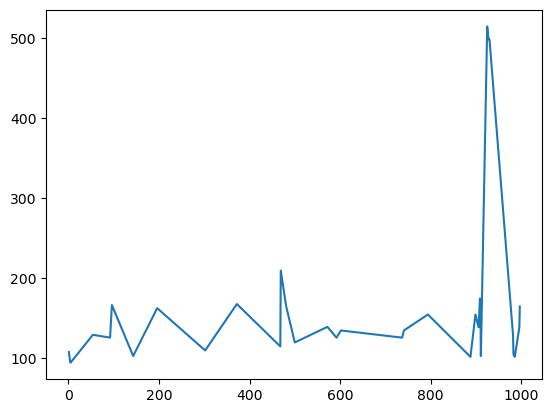

In [23]:
price_df.plot()

In [24]:
price_df.describe()

count     34.000000
mean     167.138235
std      109.894357
min       94.950000
25%      111.250000
50%      134.950000
75%      165.000000
max      515.000000
Name: new_price, dtype: float64

In [25]:
price_df.describe()

count     34.000000
mean     167.138235
std      109.894357
min       94.950000
25%      111.250000
50%      134.950000
75%      165.000000
max      515.000000
Name: new_price, dtype: float64

In [26]:
price_per_ml = df['new_price']/df['ml']
price_per_ml


0       2.445500
1       2.159000
2       1.869000
3       1.032000
4       1.899000
          ...   
998     0.750000
999     1.537500
1000    0.322034
1001    5.133333
1002    0.942000
Length: 1003, dtype: float64

In [27]:
price_per_ml.describe()

count    1003.000000
mean        1.749847
std         1.350871
min         0.072500
25%         0.875000
50%         1.466000
75%         2.221667
max        11.813333
dtype: float64

In [28]:
import matplotlib.pyplot as plt

<Axes: >

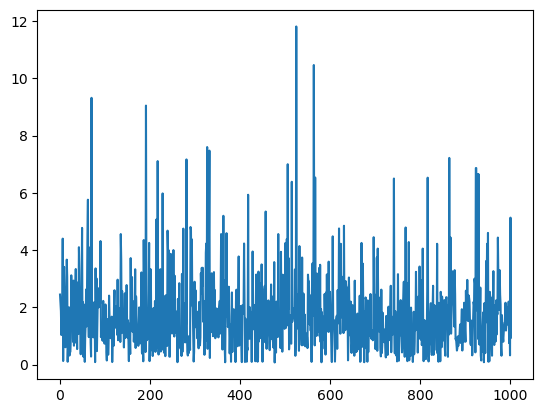

In [29]:
price_per_ml.plot()